In [148]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
from sklearn.metrics import roc_curve

In [149]:
df = pd.read_excel('/home/manikanta/Desktop/AMRproject/Development of new prediction model data_Nov 2023_7951 patients.xlsx')

In [150]:
df.shape

(7951, 168)

In [151]:
for i in df.columns:
    print(i)

PatientUniqueID
Age
Gender
IsPregnant
Menopausalstatus
IUCDUsage
HistoryofWhiteDischarge
MaritalStatus
NoOfChildren
StorageSymptoms
VoidingSymptoms
Dysuria
SuprapubicPain
Hematuria
FoulSmellingUrine
CloudyUrine
HOFeverChills
HOGeneralizedWeaknessMalaise
HONauseaVomiting
HOFlankPain
HOLossOfAppetite
HOConstipation
HOTesticularPainOrMass
HOCatheterization
Catheterization_IsIndwelling_Or_IsClean_intermittent
Dateof_Catheterization
Urologicintervention_in_last_3months
Urological_IsDiversion_Or_IsSurgery
InPatient_Yes_or_No
if_ward_icu_both
DateofAdmission_Ward
DateofExit_Ward
DateofAdmission_ICU
DateofExit_ICU
Dateof_Admission_both_To_Ward
Dateof_Exit_both_From_Ward
Dateof_Admission_both_To_ICU
Dateof_Exit_both_from_ICU
Dateof_ReAdmissionto_Ward
Dateof_ReExitfrom_Ward
DateofAdmission_bothICUWard_ICU
DateofExit_bothICUWard_ICU
DateofAdmission_bothICUWard_Ward
DateofExit_bothICUWard_Ward
Length_of_stay_inhospital
Surgicalstatus
Prophylactic_Antibiotic
Nameof_prophylacticAntibiotic
Pre_OP_Uri

In [152]:
df_head = df.head()
df_info = df.info()
df_describe = df.describe()


df_head, df_info, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Columns: 168 entries, PatientUniqueID to Gynaecologicalmalignancy
dtypes: datetime64[ns](15), float64(121), int64(2), object(30)
memory usage: 10.2+ MB


(  PatientUniqueID  Age  Gender  IsPregnant  Menopausalstatus  IUCDUsage  \
 0        3SK6L3UR   40     1.0         NaN               NaN        NaN   
 1        PAQJU316   48     1.0         NaN               NaN        NaN   
 2        E5G5YY9I   37     2.0         2.0               NaN        NaN   
 3        TOE3D1AA   58     1.0         NaN               NaN        NaN   
 4        SKVKL9I0   84     1.0         NaN               NaN        NaN   
 
    HistoryofWhiteDischarge  MaritalStatus  NoOfChildren StorageSymptoms  ...  \
 0                      NaN            1.0             1               1  ...   
 1                      NaN            1.0             2               5  ...   
 2                      NaN            1.0             2               1  ...   
 3                      NaN            1.0             7               5  ...   
 4                      NaN            2.0             0               4  ...   
 
   UretericStent  NephrostomyTube  UrologicalProcedure

In [153]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().mean() * 100).round(2)

# Find columns with more than 80% null values
columns_with_high_nulls = null_percentage[null_percentage > 60]

# List the column names with more than 80% null values
column_names_with_high_nulls = columns_with_high_nulls.index.tolist()

# Print the list of column names and the count of columns with more than 80% null values
print("Column names with more than 80% null values:")
print(column_names_with_high_nulls)

print("\nCount of columns with more than 60% null values:", len(column_names_with_high_nulls))

Column names with more than 80% null values:
['Menopausalstatus', 'IUCDUsage', 'HistoryofWhiteDischarge', 'Catheterization_IsIndwelling_Or_IsClean_intermittent', 'Dateof_Catheterization', 'Urological_IsDiversion_Or_IsSurgery', 'if_ward_icu_both', 'DateofAdmission_Ward', 'DateofExit_Ward', 'DateofAdmission_ICU', 'DateofExit_ICU', 'Dateof_Admission_both_To_Ward', 'Dateof_Exit_both_From_Ward', 'Dateof_Admission_both_To_ICU', 'Dateof_Exit_both_from_ICU', 'Dateof_ReAdmissionto_Ward', 'Dateof_ReExitfrom_Ward', 'DateofAdmission_bothICUWard_ICU', 'DateofExit_bothICUWard_ICU', 'DateofAdmission_bothICUWard_Ward', 'DateofExit_bothICUWard_Ward', 'Length_of_stay_inhospital', 'Surgicalstatus', 'Prophylactic_Antibiotic', 'Nameof_prophylacticAntibiotic', 'Pre_OP_UrineCulture', 'PreUrine_Culture_Positive_Negative', 'Name_of_Organism_UrineCulture', 'PreUrineNOOID', 'Name_of_ASTReport_UrineCulture', 'PreUrineASTID', 'NameofOrganismDocPath', 'ASTReportDocPath', 'Devices_in_situ', 'NoOfPreviousUTI', 'Is_he

In [154]:
df=df.drop(['Menopausalstatus', 'IUCDUsage', 'HistoryofWhiteDischarge', 'Catheterization_IsIndwelling_Or_IsClean_intermittent', 'Dateof_Catheterization', 'Urological_IsDiversion_Or_IsSurgery', 'if_ward_icu_both', 'DateofAdmission_Ward', 'DateofExit_Ward', 'DateofAdmission_ICU', 'DateofExit_ICU', 'Dateof_Admission_both_To_Ward', 'Dateof_Exit_both_From_Ward', 'Dateof_Admission_both_To_ICU', 'Dateof_Exit_both_from_ICU', 'Dateof_ReAdmissionto_Ward', 'Dateof_ReExitfrom_Ward', 'DateofAdmission_bothICUWard_ICU', 'DateofExit_bothICUWard_ICU', 'DateofAdmission_bothICUWard_Ward', 'DateofExit_bothICUWard_Ward', 'Length_of_stay_inhospital', 'Surgicalstatus', 'Prophylactic_Antibiotic', 'Nameof_prophylacticAntibiotic', 'Pre_OP_UrineCulture', 'PreUrine_Culture_Positive_Negative', 'Name_of_Organism_UrineCulture', 'PreUrineNOOID', 'Name_of_ASTReport_UrineCulture', 'PreUrineASTID', 'NameofOrganismDocPath', 'ASTReportDocPath', 'Devices_in_situ', 'NoOfPreviousUTI', 'Is_he_Or_she_on_prophylaxis', 'Nameof_Prophylaxis_Antibiotic', 'HOTuburculosis_Ispulmanory_or_NonPulmanory', 'HospAdmiss_in1Year_NoofTimes', 'FirstTime_HospLocationtimeof_infec', 'FirstTime_Reason', 'FirstTime_Surgery', 'FirstTime_DurationofHosp', 'FirstTime_Devicesin_SITU_IsCatheterized_or_Intubated', 'FirstTime_DurationofCatheterization', 'secondTime_HospLocationtimeof_infec', 'secondTime_Reason', 'secondTime_Surgery', 'secondTime_DurationofHosp', 'secondTime_Devicesin_SITU_IsCatheterized_or_Intubated', 'secondTime_DurationofCatheterization', 'ThirdTime_HospLocationtimeof_infec', 'ThirdTime_Reason', 'ThirdTime_Surgery', 'ThirdTime_DurationofHosp', 'ThirdTime_Devicesin_SITU_IsCatheterized_or_Intubated', 'ThirdTime_DurationofCatheterization', 'PriorUseofAntibiotic_3mnths_Or_1Year', 'CRP', 'Urine_Nameof_Organism', 'Urine_AST_Report', 'UrineCultureNameOfOrganismDocPath', 'Name_of_Organism', 'BloodNOOID', 'AST_Report', 'BloodASTID', 'BloodCultureNameOfOrganismDocPath', 'BloodCultureASTReportDocPath'],axis=1)


In [155]:
df.shape

(7951, 100)

In [156]:
df.columns

Index(['PatientUniqueID', 'Age', 'Gender', 'IsPregnant', 'MaritalStatus',
       'NoOfChildren', 'StorageSymptoms', 'VoidingSymptoms', 'Dysuria',
       'SuprapubicPain', 'Hematuria', 'FoulSmellingUrine', 'CloudyUrine',
       'HOFeverChills', 'HOGeneralizedWeaknessMalaise', 'HONauseaVomiting',
       'HOFlankPain', 'HOLossOfAppetite', 'HOConstipation',
       'HOTesticularPainOrMass', 'HOCatheterization',
       'Urologicintervention_in_last_3months', 'InPatient_Yes_or_No',
       'HOPreviousUTI', 'DocumentationofInfection_within_1_Year',
       'HO_Tuburculosis', 'HO_SexualExposure', 'HospAdmiss_in1Year',
       'PriorUseofAntibiotic', 'PriorUseOfSpecificAntibioticsWithin3Months',
       'Immunosuppressanttreatment_within1Year', 'TravelHistory_within_2weeks',
       'MyocardialInfection', 'CongestiveHeartFailure',
       'PeripheralVascularDisease', 'CerebrovascularDisease', 'Dementia',
       'ChronicPulmonaryDisease', 'ConnectiveTissueDisease',
       'PepticUlcerDisease', 'MildLiv

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7949 non-null   object 
 7   VoidingSymptoms                             7949 non-null   object 
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria  

In [158]:
datetime_columns = [col for col in df.columns if df[col].dtype == 'datetime64[ns]']
datetime_columns

[]

In [159]:
df['AnyOthers'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7951 entries, 0 to 7950
Series name: AnyOthers
Non-Null Count  Dtype 
--------------  ----- 
5401 non-null   object
dtypes: object(1)
memory usage: 62.2+ KB


In [160]:
df.drop(columns=['UrineCultureASTReportDocPath'],inplace=True)

In [161]:
df.drop(columns=['AnyOthers'],inplace=True)

In [162]:
df.drop(columns=['PriorUseOfSpecificAntibioticsWithin3Months'],inplace=True)

In [163]:
columns_to_remove = ['Serum_Creatinine', 'Haemoglobin', 'WBC_count','Neutrophil_Count', 'lymphocyte_Count','Bacteriuria','Haematuria','Pyuria','NeutLymph_Ratio']  # Add more columns as needed

df.drop(columns=columns_to_remove, inplace=True)

In [164]:
df.drop(columns=['UrineNOOID','UrineASTID'], inplace=True)


In [165]:
df.shape

(7951, 86)

In [166]:
pd.set_option('display.max_rows', None)


In [167]:
pd.reset_option('display.max_rows')

In [168]:
df.isnull().sum()

PatientUniqueID                0
Age                            0
Gender                         2
IsPregnant                  3909
MaritalStatus                  2
                            ... 
RenalFailure                   2
RenalTransplant                2
SpinalAnomalies                2
Cystocele                      2
Gynaecologicalmalignancy       2
Length: 86, dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7949 non-null   object 
 7   VoidingSymptoms                             7949 non-null   object 
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria   

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7949 non-null   object 
 7   VoidingSymptoms                             7949 non-null   object 
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria   

In [171]:
df.describe()

,Age,Gender,IsPregnant,MaritalStatus,NoOfChildren,Dysuria,SuprapubicPain,Hematuria,FoulSmellingUrine,CloudyUrine,...,UretericStent,NephrostomyTube,UrologicalProcedures,IlealConduit,MedullarySpongeKidney,RenalFailure,RenalTransplant,SpinalAnomalies,Cystocele,Gynaecologicalmalignancy
count,7951.000000,7949.000000,4042.000000,7949.000000,7951.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,...,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000
mean,46.573764,1.506479,2.034142,1.159140,1.663564,1.842119,1.969430,2.004403,1.949050,1.946660,...,2.029563,2.042395,2.000377,2.044534,2.045540,1.983143,2.036860,2.043905,2.147063,2.176374
std,20.798242,0.499989,0.423654,0.365829,1.194275,0.535698,0.427356,0.389670,0.451521,0.452775,...,0.245250,0.215968,0.299093,0.211114,0.210899,0.328127,0.229932,0.212729,0.365381,0.386408
min,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,49.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,63.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,97.000000,2.000000,3.000000,2.000000,9.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [172]:
df.head()

,PatientUniqueID,Age,Gender,IsPregnant,MaritalStatus,NoOfChildren,StorageSymptoms,VoidingSymptoms,Dysuria,SuprapubicPain,...,UretericStent,NephrostomyTube,UrologicalProcedures,IlealConduit,MedullarySpongeKidney,RenalFailure,RenalTransplant,SpinalAnomalies,Cystocele,Gynaecologicalmalignancy
0,3SK6L3UR,40,1.0,NaN,1.0,1,1,6,1.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,PAQJU316,48,1.0,NaN,1.0,2,5,8,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
2,E5G5YY9I,37,2.0,2.0,1.0,2,1,8,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,TOE3D1AA,58,1.0,NaN,1.0,7,5,8,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
4,SKVKL9I0,84,1.0,NaN,2.0,0,4,8,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<Axes: >

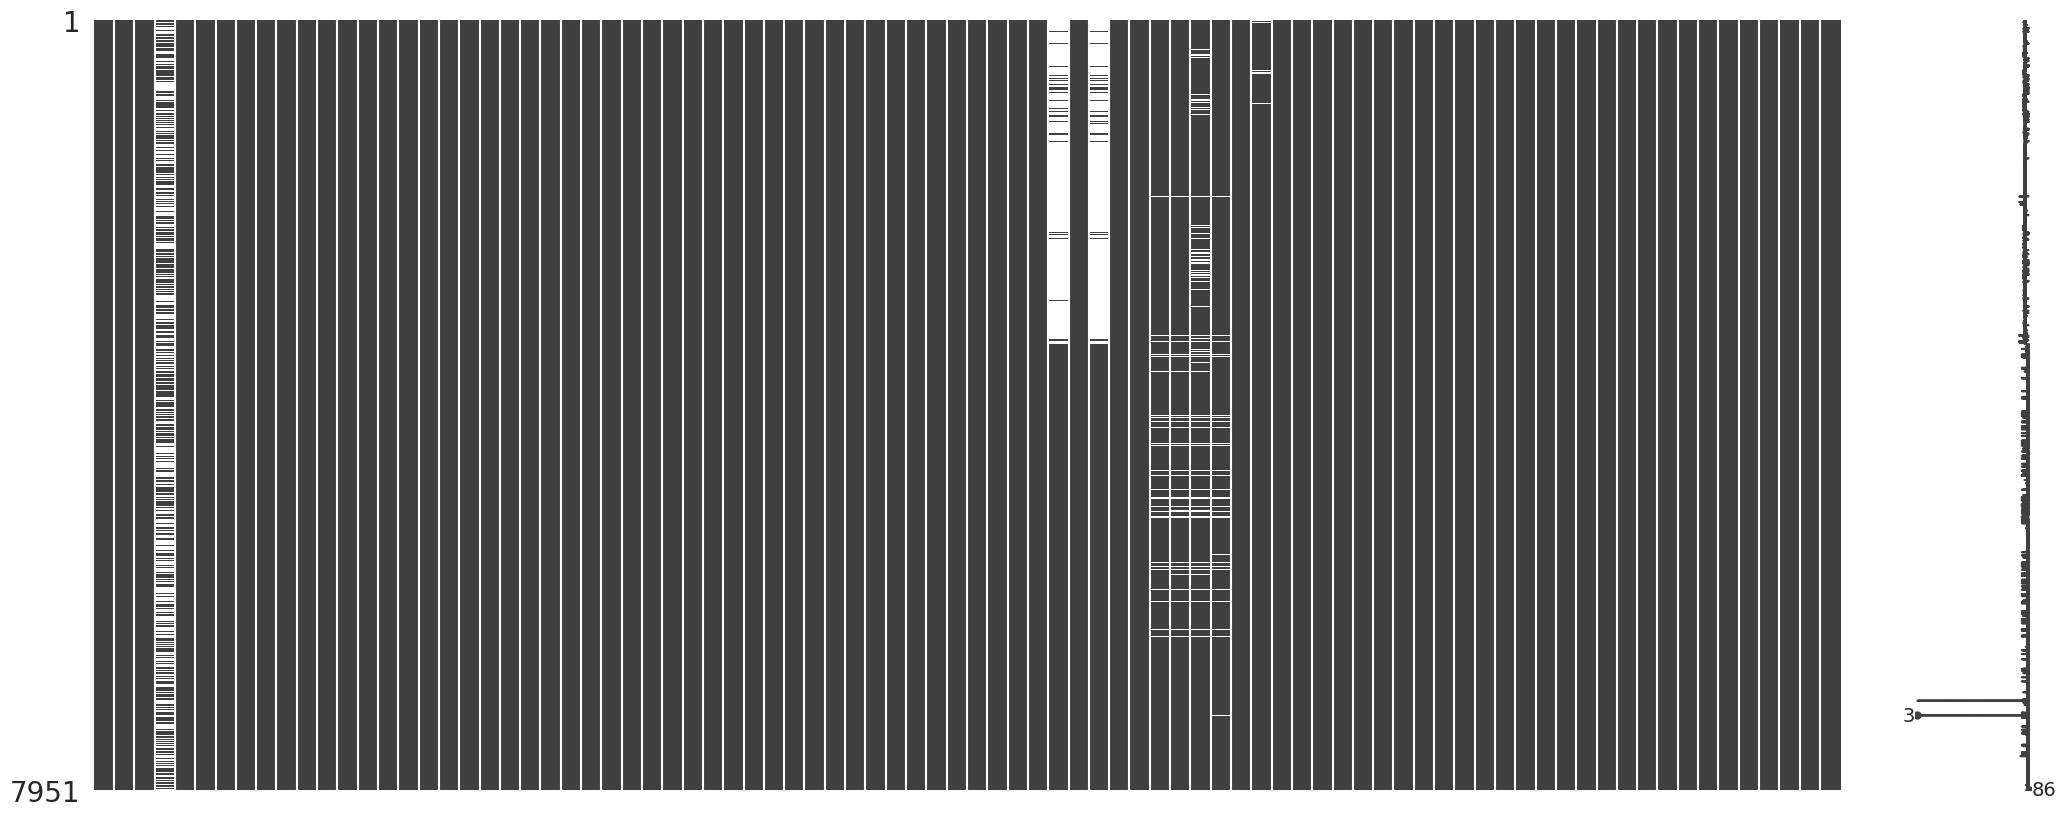

In [173]:
import missingno as msno

# Visualize missing values
msno.matrix(df)

<Axes: >

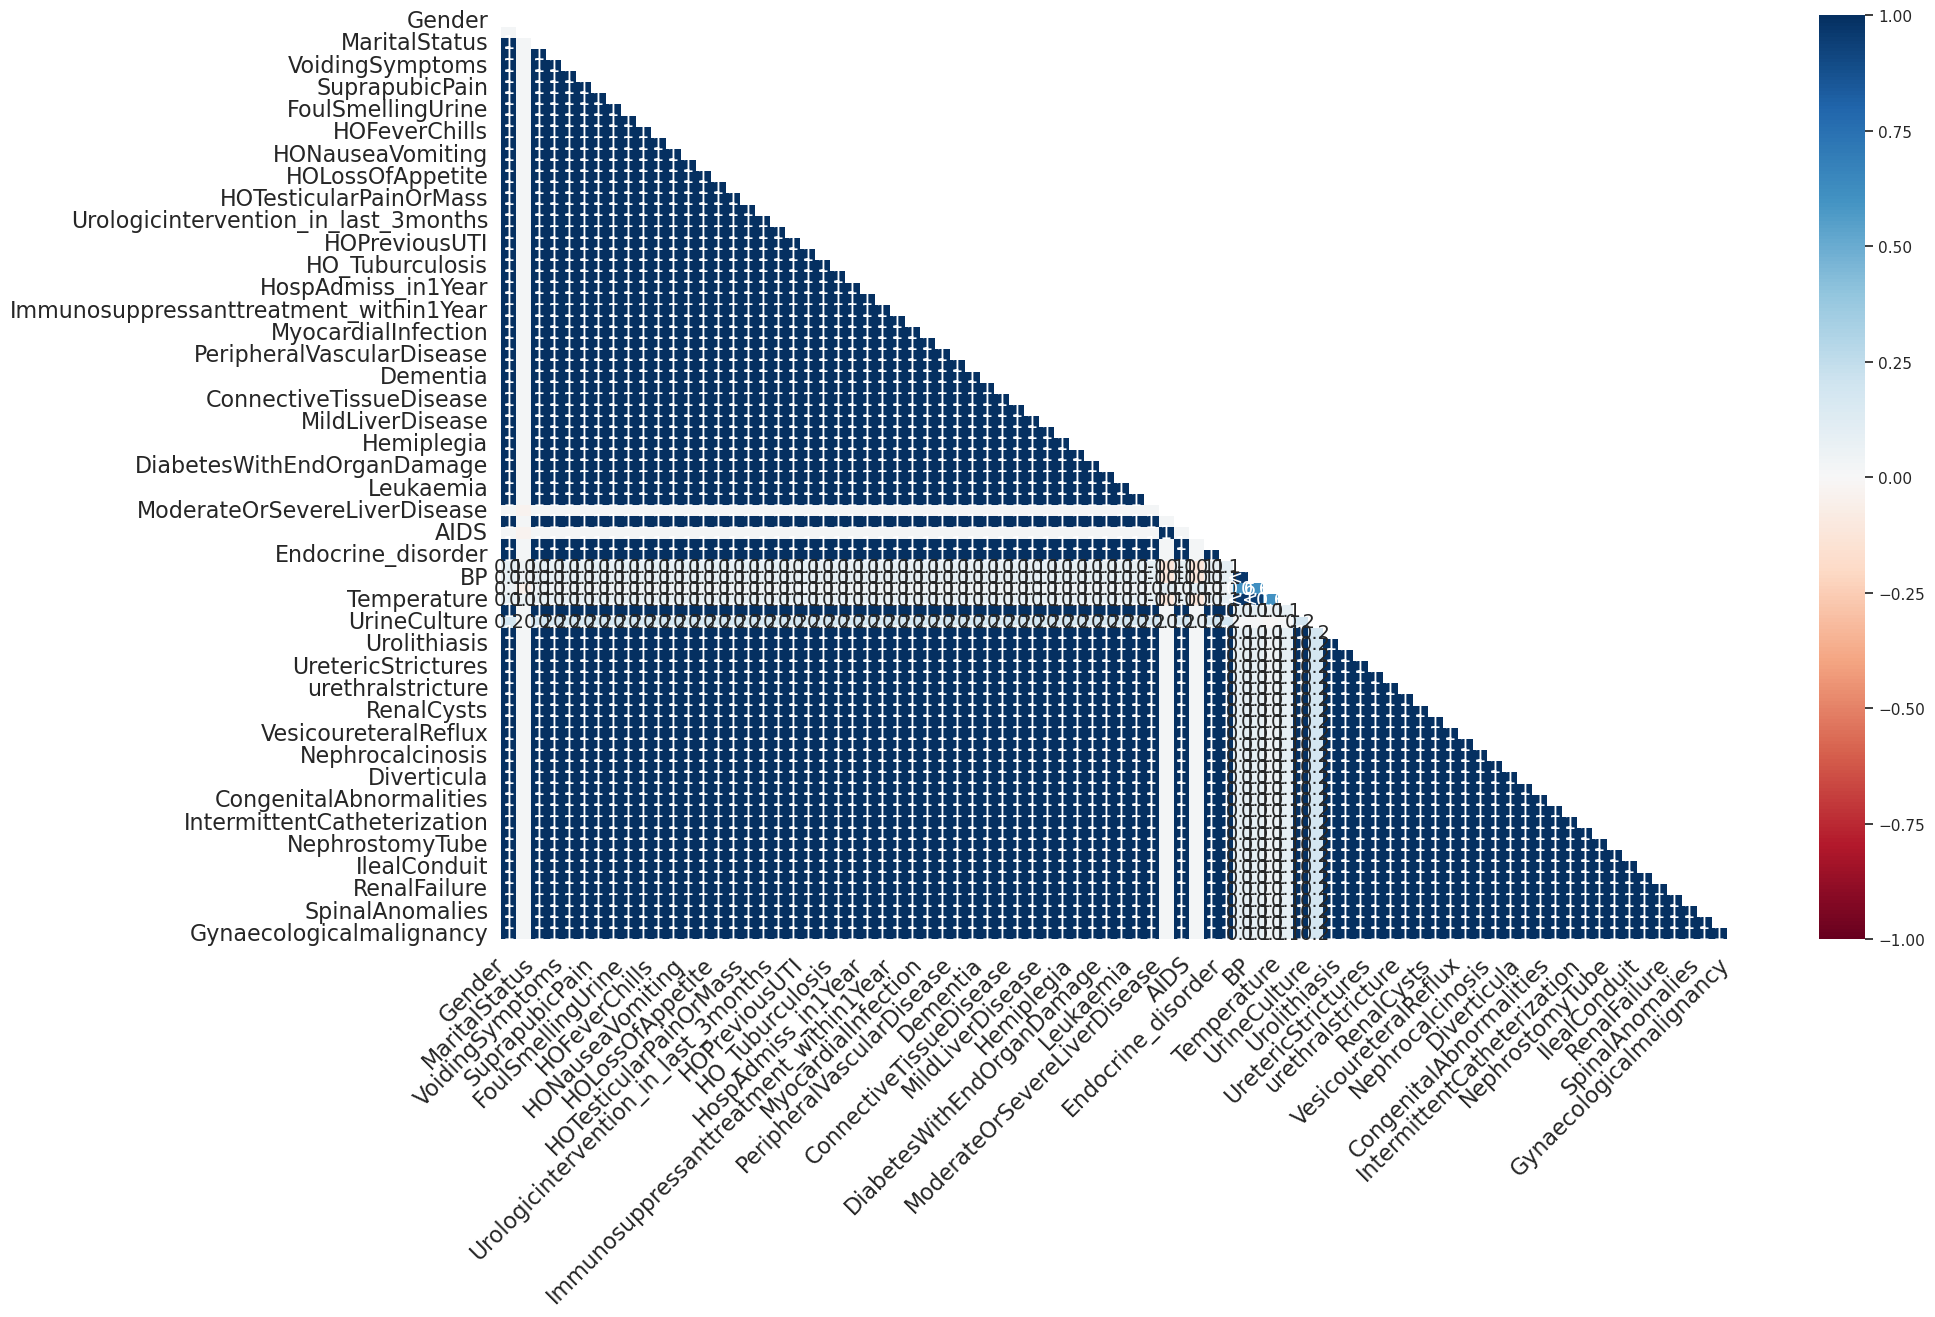

In [174]:
msno.heatmap(df)

In [175]:
df['StorageSymptoms'].value_counts()

StorageSymptoms
5             4848
1             1369
1, 2           737
2              393
3              179
4              143
1, 2, 3         81
1, 3            53
2, 3            35
1, 2, 3, 4      34
1, 2, 4         24
1, 4            18
2, 4            14
3, 4             7
1, 3, 4          6
2, 3, 4          6
2, 5             1
3, 4, 5          1
Name: count, dtype: int64

In [176]:
# Function to apply the transformation If only value 5 is present it should be changed to 0 else to 1
def transform_value(value):
    if '5' in str(value):
        if len(str(value).split(',')) == 1:
            return 0
        else:
            return 1
    else:
        return 1

# Apply the function to the column
df['StorageSymptoms'] = df['StorageSymptoms'].apply(transform_value)

In [177]:
df['VoidingSymptoms'].value_counts()

VoidingSymptoms
8       6036
6       1220
7        507
6, 7     181
6, 8       4
7, 8       1
Name: count, dtype: int64

In [178]:
#4,5,6 = 6,7,8 i.e 4==6,5==7,6==8.

In [179]:
# Function to apply the transformation  If only value 8 is present it should be changed to 0 else to 1
def transform_value(value):
    if '8' in str(value):
        if len(str(value).split(',')) == 1:
            return 0
        else:
            return 1
    else:
        return 1

# Apply the function to the column
df['VoidingSymptoms'] = df['VoidingSymptoms'].apply(transform_value)

In [180]:
df['PR'].value_counts()

PR
80      992
87      591
100     412
82      345
86      342
       ... 
9884      1
56        1
14        1
54        1
 NA       1
Name: count, Length: 112, dtype: int64

In [181]:
df['PR'] = df['PR'].replace(['na', ' NA'], np.nan)

# Replace '120mi' with 120
df['PR'] = df['PR'].replace('120mi', 120)

In [182]:
df['PR'] = pd.to_numeric(df['PR'], errors='coerce')

In [183]:
df['BP'].value_counts()

BP
120/80    1056
110/70     483
140/90     320
120/83     292
130/80     277
          ... 
92/61        1
98/52        1
151/80       1
170/86       1
100/7        1
Name: count, Length: 1075, dtype: int64

In [184]:
import pandas as pd

# Assuming selected_df is your DataFrame and 'BP' is the column containing blood pressure values

# Creating new columns for Systolic_BP and Diastolic_BP
df['Systolic_BP'] = None
df['Diastolic_BP'] = None

# Splitting the 'BP' column into two separate columns
split_values = df['BP'].str.split('/', expand=True)

# Assigning split values to the new columns
df['Systolic_BP'] = pd.to_numeric(split_values[0], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(split_values[1], errors='coerce')

# Handling cases with 'nil', 'NA', or empty values
df['Systolic_BP'].replace({None: None, 'nil': None, 'NA': None, '': None}, inplace=True)
df['Diastolic_BP'].replace({None: None, 'nil': None, 'NA': None, '': None}, inplace=True)

In [185]:
df.drop(columns=['BP'], inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7951 non-null   int64  
 7   VoidingSymptoms                             7951 non-null   int64  
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria   

In [187]:
df['RR'].value_counts()

RR
20      1084
18      1003
24       798
22       633
25       587
        ... 
206        1
4000       1
NIL        1
65         1
90         1
Name: count, Length: 67, dtype: int64

In [188]:
df['RR'] = df['RR'].replace(['na', ' NA','NIL'], np.nan)

In [189]:
df['RR'] = pd.to_numeric(df['RR'], errors='coerce')

In [190]:
df['Temperature'].value_counts()

Temperature
37      1707
37.1     975
36.5     557
38.0     439
36.2     350
        ... 
365        1
33.1       1
32.1       1
32.3       1
35.3       1
Name: count, Length: 135, dtype: int64

In [191]:
# Replace 'na' with NaN
df['Temperature'] = df['Temperature'].replace('na', np.nan)

# Function to clean temperature values
def clean_temperature(temp):
    if isinstance(temp, str):
        temp = temp.replace(' F', '').replace('F', '').replace(' c', '')
        temp = temp.replace('..', '.')
    return temp

# Apply the function to the Temperature column
df['Temperature'] = df['Temperature'].apply(clean_temperature)

# Convert the column to numeric, forcing errors to NaN (this handles remaining non-numeric values)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')


In [192]:
df.loc[df['Temperature'] > 50.0, 'Temperature'] = (df.loc[df['Temperature'] > 50.0, 'Temperature'] - 32) * 5 / 9

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7951 non-null   int64  
 7   VoidingSymptoms                             7951 non-null   int64  
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria   

In [194]:
df['RR'].value_counts()

RR
20.0     1084
18.0     1003
24.0      798
22.0      633
25.0      587
         ... 
206.0       1
141.0       1
83.0        1
65.0        1
90.0        1
Name: count, Length: 64, dtype: int64

In [195]:
df.shape

(7951, 87)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PatientUniqueID                             7951 non-null   object 
 1   Age                                         7951 non-null   int64  
 2   Gender                                      7949 non-null   float64
 3   IsPregnant                                  4042 non-null   float64
 4   MaritalStatus                               7949 non-null   float64
 5   NoOfChildren                                7951 non-null   int64  
 6   StorageSymptoms                             7951 non-null   int64  
 7   VoidingSymptoms                             7951 non-null   int64  
 8   Dysuria                                     7949 non-null   float64
 9   SuprapubicPain                              7949 non-null   float64
 10  Hematuria   

In [197]:
import numpy as np

# For Gender value 1.0, set IsPregnant to 3.0
df.loc[df['Gender'] == 1.0, 'IsPregnant'] = 3.0

# For Gender value 2.0, set IsPregnant to 1.0 or 2.0 if IsPregnant is already present
df.loc[(df['Gender'] == 2.0) & (df['IsPregnant'].isin([1.0, 2.0])), 'IsPregnant'] = df['IsPregnant']

# For Gender value 2.0, set IsPregnant to random of 1.0 or 2.0 if IsPregnant is 3.0 or NaN
mask = (df['Gender'] == 2.0) & (df['IsPregnant'].isin([3.0, np.nan]))
random_values = np.random.choice([1.0, 2.0], size=sum(mask), replace=True)
df.loc[mask, 'IsPregnant'] = random_values

In [198]:
df.isnull().sum()

PatientUniqueID               0
Age                           0
Gender                        2
IsPregnant                    2
MaritalStatus                 2
                           ... 
SpinalAnomalies               2
Cystocele                     2
Gynaecologicalmalignancy      2
Systolic_BP                 291
Diastolic_BP                312
Length: 87, dtype: int64

In [199]:
df['ModerateOrSevereLiverDisease'].value_counts()

ModerateOrSevereLiverDisease
2.0    4767
3.0      63
1.0      34
Name: count, dtype: int64

In [200]:
df['ModerateOrSevereLiverDisease'].fillna(2.0, inplace=True)


In [201]:
df['AIDS'].fillna(2.0, inplace=True)


In [202]:
df['AIDS'].value_counts()

AIDS
2.0    7884
3.0      67
Name: count, dtype: int64

q1 80.0
q3 95.0
IQR 15.0
lowerbond 57.5
upperbound 117.5
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
30          7LGCXR10   40     1.0         3.0            1.0             0   
58          2UOB7YLV   51     2.0         2.0            1.0             1   
93          6R7S0HFF   56     1.0         3.0            1.0             2   
157         PKNV3Q3J   13     1.0         3.0            2.0             0   
511         5OM9558N   31     1.0         3.0            1.0             0   
...              ...  ...     ...         ...            ...           ...   
7606        LODGCE6E   -1     1.0         3.0            2.0             0   
7613        CX3UZE56    1     1.0         3.0            2.0             0   
7681        236IWS1J   10     1.0         3.0            2.0             0   
7734        U2ZH4TFI   39     2.0         2.0            1.0             2   
7744        2Q2AXYAA   21     2.0         1.0            1.0             0   

      

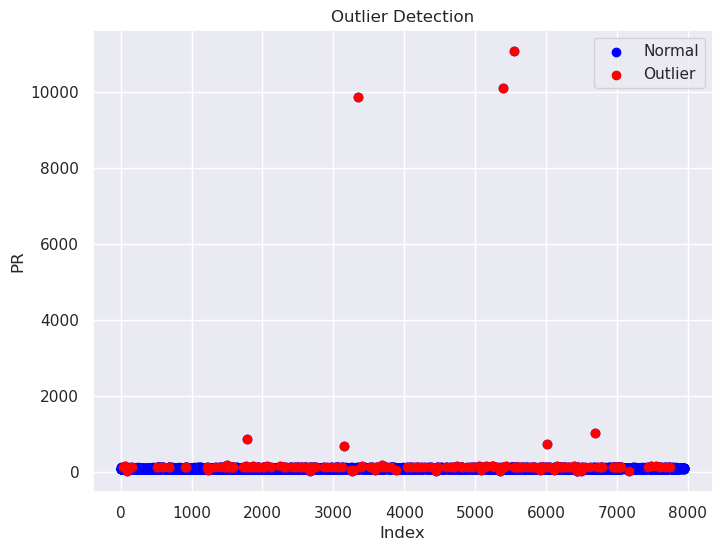

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['PR'].quantile(0.25)
Q3 = df['PR'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['PR'] < lower_bound) | (df['PR'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['PR'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['PR'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('PR')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [204]:
import numpy as np

# Calculate the median of the pulse rate column
median_pulse_rate = df['PR'].median()

# Calculate the lower and upper thresholds for outliers using the IQR method
Q1 = df['PR'].quantile(0.25)
Q3 = df['PR'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['PR'] = df['PR'].mask((df['PR'] < lower_threshold) | (df['PR'] > upper_threshold), median_pulse_rate)

q1 80.0
q3 93.0
IQR 13.0
lowerbond 60.5
upperbound 112.5
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
136         YXBVKDHX   67     2.0         2.0            1.0             3   
283         16YEZE3K   30     1.0         3.0            1.0             2   
543         4QLYY5AB   14     1.0         3.0            2.0             0   
677         3ZCD04LX   52     2.0         2.0            1.0             3   
915         TOTTNAFQ   74     1.0         3.0            2.0             0   
...              ...  ...     ...         ...            ...           ...   
7548        KO6LZX7L    7     2.0         2.0            2.0             0   
7550        80B0GZ9H    4     2.0         2.0            2.0             0   
7640        7WJVLQUD   -1     2.0         1.0            2.0             0   
7774        J8ZBAFGH    5     1.0         3.0            2.0             0   
7831        8SOHEWSJ    4     2.0         2.0            2.0             0   

      

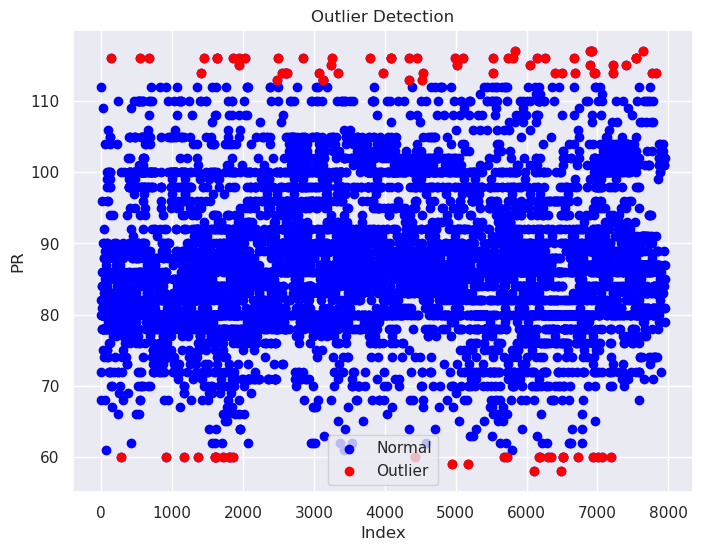

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['PR'].quantile(0.25)
Q3 = df['PR'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['PR'] < lower_bound) | (df['PR'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['PR'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['PR'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('PR')
plt.title('Outlier Detection')
plt.legend()
plt.show()


q1 18.0
q3 24.0
IQR 6.0
lowerbond 9.0
upperbound 33.0
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
7           KXAU6S3P   65     1.0         3.0            1.0             2   
93          6R7S0HFF   56     1.0         3.0            1.0             2   
119         QMI32S0N   52     1.0         3.0            1.0             3   
176         HELXP664   81     1.0         3.0            1.0             0   
212         T60LYZOZ   53     2.0         2.0            1.0             1   
...              ...  ...     ...         ...            ...           ...   
7840        LVWJA3N3   80     1.0         3.0            1.0             2   
7854        2XC8ZE5F   23     2.0         1.0            1.0             0   
7857        TP52L30Z   51     1.0         3.0            1.0             2   
7863        LKLMZF5L   58     1.0         3.0            1.0             2   
7864        VPCNO84H   63     1.0         3.0            1.0             3   

      Sto

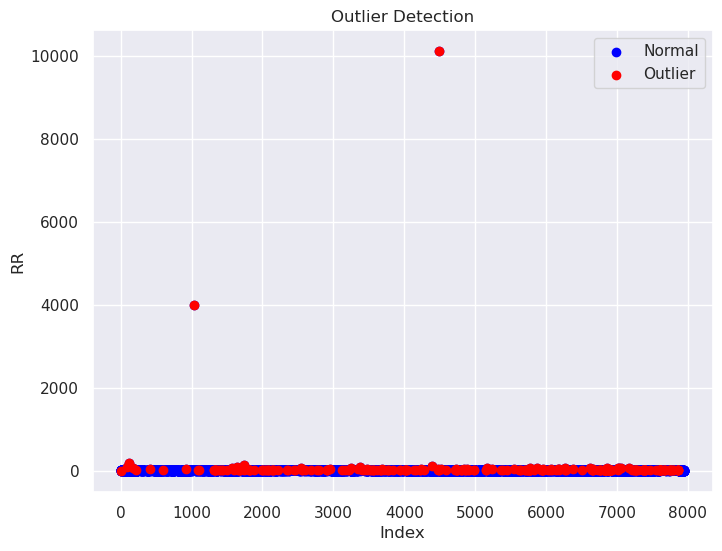

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['RR'] < lower_bound) | (df['RR'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['RR'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['RR'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('RR')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [207]:
import numpy as np

# Calculate the median of the pulse rate column
median_pulse_rate = df['RR'].median()

# Calculate the lower and upper thresholds for outliers using the IQR method
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['RR'] = df['RR'].mask((df['RR'] < lower_threshold) | (df['RR'] > upper_threshold), median_pulse_rate)

q1 18.0
q3 24.0
IQR 6.0
lowerbond 9.0
upperbound 33.0
Empty DataFrame
Columns: [PatientUniqueID, Age, Gender, IsPregnant, MaritalStatus, NoOfChildren, StorageSymptoms, VoidingSymptoms, Dysuria, SuprapubicPain, Hematuria, FoulSmellingUrine, CloudyUrine, HOFeverChills, HOGeneralizedWeaknessMalaise, HONauseaVomiting, HOFlankPain, HOLossOfAppetite, HOConstipation, HOTesticularPainOrMass, HOCatheterization, Urologicintervention_in_last_3months, InPatient_Yes_or_No, HOPreviousUTI, DocumentationofInfection_within_1_Year, HO_Tuburculosis, HO_SexualExposure, HospAdmiss_in1Year, PriorUseofAntibiotic, Immunosuppressanttreatment_within1Year, TravelHistory_within_2weeks, MyocardialInfection, CongestiveHeartFailure, PeripheralVascularDisease, CerebrovascularDisease, Dementia, ChronicPulmonaryDisease, ConnectiveTissueDisease, PepticUlcerDisease, MildLiverDisease, DiabetesWithoutEndOrganDamage, Hemiplegia, ModerateOrSevereRenalDisease, DiabetesWithEndOrganDamage, TumourWithoutMetastases, Leukaemia, Ly

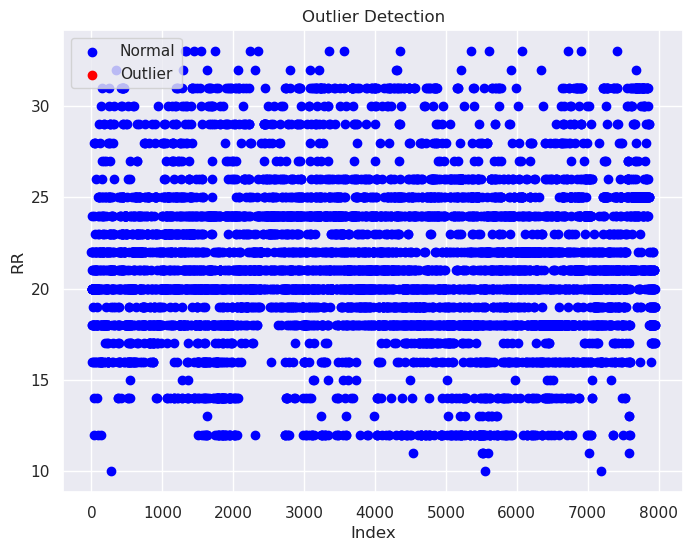

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['RR'] < lower_bound) | (df['RR'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['RR'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['RR'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('RR')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [209]:
df.isnull().sum()

PatientUniqueID               0
Age                           0
Gender                        2
IsPregnant                    2
MaritalStatus                 2
                           ... 
SpinalAnomalies               2
Cystocele                     2
Gynaecologicalmalignancy      2
Systolic_BP                 291
Diastolic_BP                312
Length: 87, dtype: int64

q1 36.6
q3 37.3
IQR 0.6999999999999957
lowerbond 35.55000000000001
upperbound 38.349999999999994
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
4           SKVKL9I0   84     1.0         3.0            2.0             0   
9           77Z5KUV5    7     2.0         2.0            2.0             0   
35          2JSVGLJU   79     1.0         3.0            1.0             4   
36          C7ODSYIE   27     2.0         1.0            2.0             0   
126         9Q7CUG43   72     2.0         2.0            1.0             2   
...              ...  ...     ...         ...            ...           ...   
7737        TX6LWS9Z   73     2.0         2.0            1.0             2   
7748        33DX2PMU   32     2.0         2.0            1.0             2   
7755        IU3FEDTF   65     1.0         3.0            1.0             4   
7771        DL16QZ2Z   42     1.0         3.0            1.0             2   
7840        LVWJA3N3   80     1.0         3.0

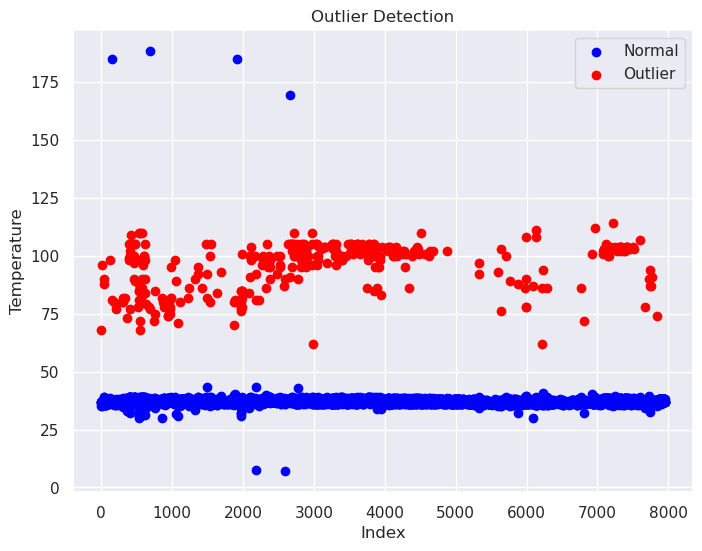

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Temperature'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['PR'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [211]:
df['Temperature'].median()

37.0

In [212]:
import numpy as np

# Calculate the median of the pulse rate column
median_pulse_rate = df['Temperature'].median()

# Calculate the lower and upper thresholds for outliers using the IQR method
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['Temperature'] = df['Temperature'].mask((df['Temperature'] < lower_threshold) | (df['Temperature'] > upper_threshold), median_pulse_rate)

In [213]:
df['Temperature'].median()

37.0

q1 36.6
q3 37.2
IQR 0.6000000000000014
lowerbond 35.7
upperbound 38.10000000000001
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
15          D49KZZTX    5     2.0         1.0            2.0             0   
16          DEYM15A0   40     1.0         3.0            1.0             2   
49          4BND8F5O   14     2.0         1.0            2.0             0   
72          ROAVSJWF   66     1.0         3.0            1.0             3   
74          TTAHJXVA   54     1.0         3.0            1.0             2   
...              ...  ...     ...         ...            ...           ...   
7167        XIVVGQV8   66     1.0         3.0            1.0             2   
7557        OTJ6Y06I   -1     1.0         3.0            2.0             0   
7586        3VLQDO1N   27     2.0         2.0            2.0             0   
7627        S0C5XF9X   62     2.0         2.0            1.0             2   
7765        1M1NP2U8   47     1.0         3.0            1.

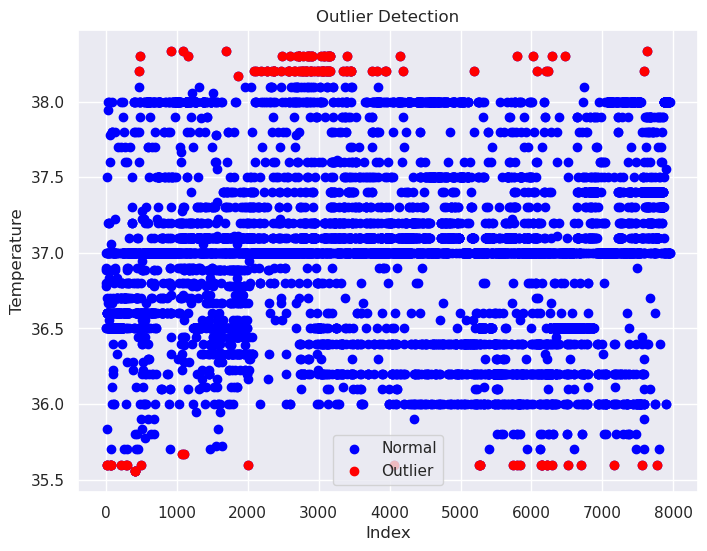

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Temperature'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['Temperature'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Outlier Detection')
plt.legend()
plt.show()

In [215]:
df['Temperature'].describe()

count    7666.000000
mean       37.008551
std         0.525256
min        35.555556
25%        36.600000
50%        37.000000
75%        37.200000
max        38.333333
Name: Temperature, dtype: float64

In [216]:
df.isnull().sum()

PatientUniqueID               0
Age                           0
Gender                        2
IsPregnant                    2
MaritalStatus                 2
                           ... 
SpinalAnomalies               2
Cystocele                     2
Gynaecologicalmalignancy      2
Systolic_BP                 291
Diastolic_BP                312
Length: 87, dtype: int64

q1 120.0
q3 130.0
IQR 10.0
lowerbond 105.0
upperbound 145.0
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
0           3SK6L3UR   40     1.0         3.0            1.0             1   
1           PAQJU316   48     1.0         3.0            1.0             2   
7           KXAU6S3P   65     1.0         3.0            1.0             2   
11          AOY2XB5S   50     2.0         2.0            1.0             2   
15          D49KZZTX    5     2.0         1.0            2.0             0   
...              ...  ...     ...         ...            ...           ...   
7899        XQ8US07V   21     1.0         3.0            2.0             0   
7901        N77SFVKO   82     2.0         2.0            1.0             4   
7906        IJJHJOOD   88     1.0         3.0            1.0             3   
7910        V5LIZ7UF   80     1.0         3.0            1.0             3   
7948        OWDWY9U4   80     1.0         3.0            1.0             4   

   

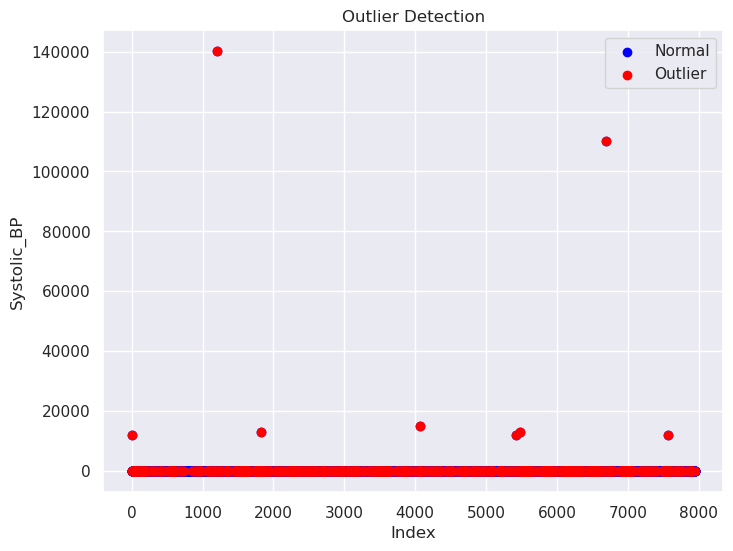

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Systolic_BP'].quantile(0.25)
Q3 = df['Systolic_BP'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Systolic_BP'] < lower_bound) | (df['Systolic_BP'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Systolic_BP'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['Systolic_BP'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Systolic_BP')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [218]:
import numpy as np

# Calculate the median of the pulse rate column
median_pulse_rate = df['Systolic_BP'].median()

# Calculate the lower and upper thresholds for outliers using the IQR method
Q1 = df['Systolic_BP'].quantile(0.25)
Q3 = df['Systolic_BP'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['Systolic_BP'] = df['Systolic_BP'].mask((df['Systolic_BP'] < lower_threshold) | (df['Systolic_BP'] > upper_threshold), median_pulse_rate)

q1 120.0
q3 130.0
IQR 10.0
lowerbond 105.0
upperbound 145.0
Empty DataFrame
Columns: [PatientUniqueID, Age, Gender, IsPregnant, MaritalStatus, NoOfChildren, StorageSymptoms, VoidingSymptoms, Dysuria, SuprapubicPain, Hematuria, FoulSmellingUrine, CloudyUrine, HOFeverChills, HOGeneralizedWeaknessMalaise, HONauseaVomiting, HOFlankPain, HOLossOfAppetite, HOConstipation, HOTesticularPainOrMass, HOCatheterization, Urologicintervention_in_last_3months, InPatient_Yes_or_No, HOPreviousUTI, DocumentationofInfection_within_1_Year, HO_Tuburculosis, HO_SexualExposure, HospAdmiss_in1Year, PriorUseofAntibiotic, Immunosuppressanttreatment_within1Year, TravelHistory_within_2weeks, MyocardialInfection, CongestiveHeartFailure, PeripheralVascularDisease, CerebrovascularDisease, Dementia, ChronicPulmonaryDisease, ConnectiveTissueDisease, PepticUlcerDisease, MildLiverDisease, DiabetesWithoutEndOrganDamage, Hemiplegia, ModerateOrSevereRenalDisease, DiabetesWithEndOrganDamage, TumourWithoutMetastases, Leukaem

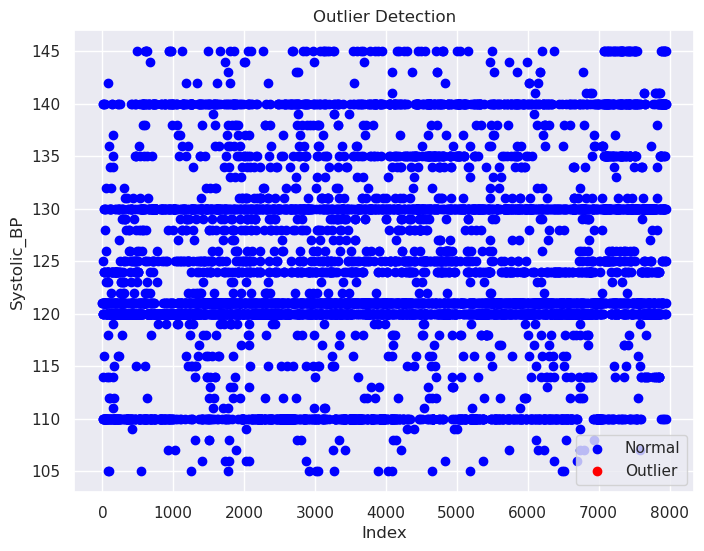

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Systolic_BP'].quantile(0.25)
Q3 = df['Systolic_BP'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Systolic_BP'] < lower_bound) | (df['Systolic_BP'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Systolic_BP'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['Systolic_BP'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Systolic_BP')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [220]:
df['Systolic_BP'].describe()

count    7660.000000
mean      123.606266
std         8.460923
min       105.000000
25%       120.000000
50%       121.000000
75%       130.000000
max       145.000000
Name: Systolic_BP, dtype: float64

In [221]:
df['Diastolic_BP'].describe()

count    7639.000000
mean       79.811101
std        17.115730
min         0.000000
25%        75.000000
50%        80.000000
75%        85.000000
max       802.000000
Name: Diastolic_BP, dtype: float64

q1 75.0
q3 85.0
IQR 10.0
lowerbond 60.0
upperbound 100.0
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
35          2JSVGLJU   79     1.0         3.0            1.0             4   
36          C7ODSYIE   27     2.0         1.0            2.0             0   
126         9Q7CUG43   72     2.0         2.0            1.0             2   
153         CLYR6BP3   73     2.0         2.0            1.0             3   
189         HZY92X4J    5     1.0         3.0            2.0             0   
...              ...  ...     ...         ...            ...           ...   
7592        J2OB9JNQ   49     1.0         3.0            1.0             3   
7603        CGKBAR46    6     1.0         3.0            2.0             0   
7606        LODGCE6E   -1     1.0         3.0            2.0             0   
7681        236IWS1J   10     1.0         3.0            2.0             0   
7899        XQ8US07V   21     1.0         3.0            2.0             0   

      

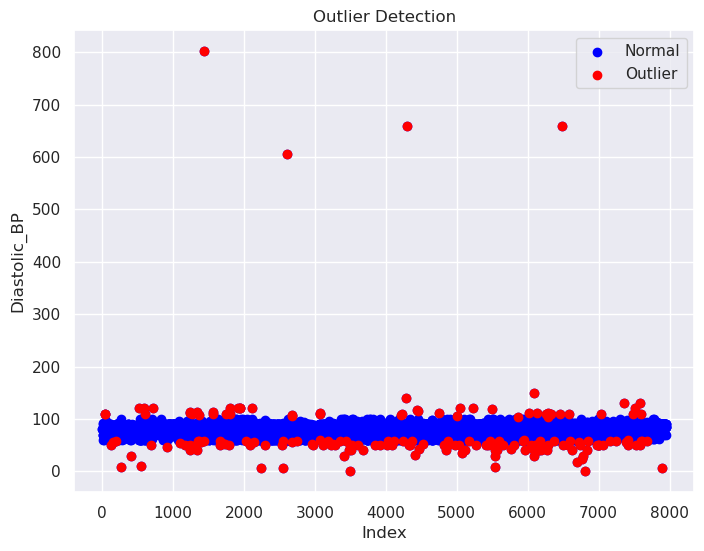

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Diastolic_BP'].quantile(0.25)
Q3 = df['Diastolic_BP'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Diastolic_BP'] < lower_bound) | (df['Diastolic_BP'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Diastolic_BP'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['Diastolic_BP'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Diastolic_BP')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [223]:
import numpy as np

# Calculate the median of the pulse rate column
median_pulse_rate = df['Diastolic_BP'].median()

# Calculate the lower and upper thresholds for outliers using the IQR method
Q1 = df['Diastolic_BP'].quantile(0.25)
Q3 = df['Diastolic_BP'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['Diastolic_BP'] = df['Diastolic_BP'].mask((df['Diastolic_BP'] < lower_threshold) | (df['Diastolic_BP'] > upper_threshold), median_pulse_rate)

q1 76.0
q3 85.0
IQR 9.0
lowerbond 62.5
upperbound 98.5
     PatientUniqueID  Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  \
11          AOY2XB5S   50     2.0         2.0            1.0             2   
30          7LGCXR10   40     1.0         3.0            1.0             0   
103         4KZIF1QM   51     1.0         3.0            1.0             2   
105         UUGX7E1Z    8     1.0         3.0            2.0             3   
127         CUF4O1K0   70     1.0         3.0            1.0             3   
...              ...  ...     ...         ...            ...           ...   
7765        1M1NP2U8   47     1.0         3.0            1.0             2   
7777        UAH4UA2V    3     2.0         2.0            2.0             0   
7781        UDXND6LF   25     2.0         1.0            1.0             0   
7784        W8J9LMXM    1     2.0         1.0            2.0             0   
7851        FV9J1O0I   10     2.0         1.0            2.0             0   

      St

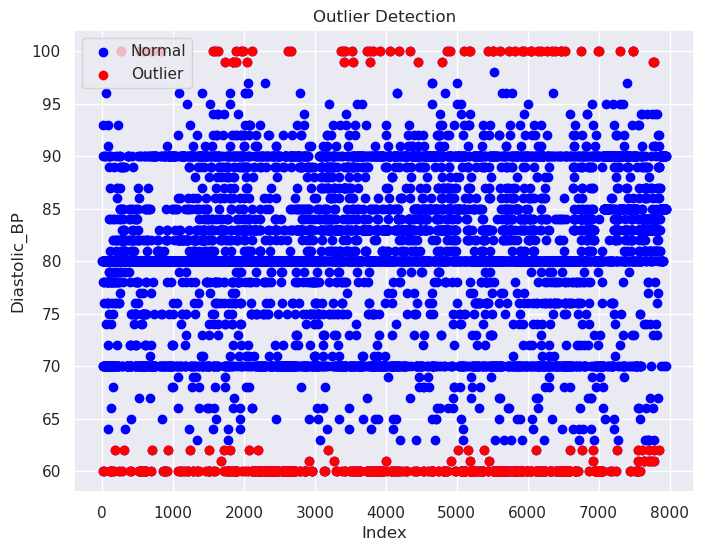

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named Neutrophil_Count

# Calculate the first and third quartiles
Q1 = df['Diastolic_BP'].quantile(0.25)
Q3 = df['Diastolic_BP'].quantile(0.75)

print("q1",Q1)

print("q3",Q3)

# Calculate the interquartile range
IQR = Q3 - Q1

print("IQR",IQR)

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lowerbond",lower_bound)

print("upperbound",upper_bound)

# Detect outliers
outliers = df[(df['Diastolic_BP'] < lower_bound) | (df['Diastolic_BP'] > upper_bound)]

print(outliers)

# Plot the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Diastolic_BP'], color='blue', label='Normal')
plt.scatter(outliers.index, outliers['Diastolic_BP'], color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Diastolic_BP')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [225]:
df.isnull().sum()

PatientUniqueID               0
Age                           0
Gender                        2
IsPregnant                    2
MaritalStatus                 2
                           ... 
SpinalAnomalies               2
Cystocele                     2
Gynaecologicalmalignancy      2
Systolic_BP                 291
Diastolic_BP                312
Length: 87, dtype: int64

In [226]:
df.columns

Index(['PatientUniqueID', 'Age', 'Gender', 'IsPregnant', 'MaritalStatus',
       'NoOfChildren', 'StorageSymptoms', 'VoidingSymptoms', 'Dysuria',
       'SuprapubicPain', 'Hematuria', 'FoulSmellingUrine', 'CloudyUrine',
       'HOFeverChills', 'HOGeneralizedWeaknessMalaise', 'HONauseaVomiting',
       'HOFlankPain', 'HOLossOfAppetite', 'HOConstipation',
       'HOTesticularPainOrMass', 'HOCatheterization',
       'Urologicintervention_in_last_3months', 'InPatient_Yes_or_No',
       'HOPreviousUTI', 'DocumentationofInfection_within_1_Year',
       'HO_Tuburculosis', 'HO_SexualExposure', 'HospAdmiss_in1Year',
       'PriorUseofAntibiotic', 'Immunosuppressanttreatment_within1Year',
       'TravelHistory_within_2weeks', 'MyocardialInfection',
       'CongestiveHeartFailure', 'PeripheralVascularDisease',
       'CerebrovascularDisease', 'Dementia', 'ChronicPulmonaryDisease',
       'ConnectiveTissueDisease', 'PepticUlcerDisease', 'MildLiverDisease',
       'DiabetesWithoutEndOrganDamage', '

In [227]:
df_regression = df.copy()

In [228]:
df_regression = df_regression.drop(columns=['PatientUniqueID'])


In [230]:
df_regression['UrineCulture'] = df_regression['UrineCulture'].apply(lambda x: 1 if x==47.0 else x)#pos
df_regression['UrineCulture'] = df_regression['UrineCulture'].apply(lambda x: 0 if x==48.0 else x)#neg

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def regression_imputation(df, target_col):
    # Split the data into training and testing sets
    train_df = df[df[target_col].notnull()]
    test_df = df[df[target_col].isnull()]

    # If there are no missing values in the column, return the original DataFrame
    if test_df.empty:
        return df

    # Features and target variable for training
    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]
    
    # Features for testing
    X_test = test_df.drop(columns=[target_col])

    # Handling any remaining missing values in the features
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the missing values
    y_pred = model.predict(X_test)

    # Fill the missing values with the predictions
    df.loc[df[target_col].isnull(), target_col] = y_pred

    return df

# Apply the regression imputation function to the columns with missing values
for col in ['PR', 'RR', 'Temperature', 'Systolic_BP', 'Diastolic_BP']:
    df_regression = regression_imputation(df_regression, col)

print(df_regression)


      Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  StorageSymptoms  \
0      40     1.0         3.0            1.0             1                1   
1      48     1.0         3.0            1.0             2                0   
2      37     2.0         2.0            1.0             2                1   
3      58     1.0         3.0            1.0             7                0   
4      84     1.0         3.0            2.0             0                1   
...   ...     ...         ...            ...           ...              ...   
7946   39     1.0         3.0            1.0             2                1   
7947   57     2.0         2.0            1.0             3                1   
7948   80     1.0         3.0            1.0             4                1   
7949   60     2.0         2.0            1.0             3                1   
7950   15     2.0         2.0            2.0             0                1   

      VoidingSymptoms  Dysuria  SuprapubicPain  Hem

In [232]:
df_regression.isnull().sum()

Age                         0
Gender                      2
IsPregnant                  2
MaritalStatus               2
NoOfChildren                0
                           ..
SpinalAnomalies             2
Cystocele                   2
Gynaecologicalmalignancy    2
Systolic_BP                 0
Diastolic_BP                0
Length: 86, dtype: int64

In [233]:
df_regression.value_counts()

Age  Gender  IsPregnant  MaritalStatus  NoOfChildren  StorageSymptoms  VoidingSymptoms  Dysuria  SuprapubicPain  Hematuria  FoulSmellingUrine  CloudyUrine  HOFeverChills  HOGeneralizedWeaknessMalaise  HONauseaVomiting  HOFlankPain  HOLossOfAppetite  HOConstipation  HOTesticularPainOrMass  HOCatheterization  Urologicintervention_in_last_3months  InPatient_Yes_or_No  HOPreviousUTI  DocumentationofInfection_within_1_Year  HO_Tuburculosis  HO_SexualExposure  HospAdmiss_in1Year  PriorUseofAntibiotic  Immunosuppressanttreatment_within1Year  TravelHistory_within_2weeks  MyocardialInfection  CongestiveHeartFailure  PeripheralVascularDisease  CerebrovascularDisease  Dementia  ChronicPulmonaryDisease  ConnectiveTissueDisease  PepticUlcerDisease  MildLiverDisease  DiabetesWithoutEndOrganDamage  Hemiplegia  ModerateOrSevereRenalDisease  DiabetesWithEndOrganDamage  TumourWithoutMetastases  Leukaemia  Lymphoma  ModerateOrSevereLiverDisease  MetastaticSolidTumour  AIDS  RecentImmunosuppressiveTherapy

In [234]:
df_regression['Gynaecologicalmalignancy'].value_counts()

Gynaecologicalmalignancy
2.0    6515
3.0    1418
1.0      16
Name: count, dtype: int64

In [235]:
df_regression['Age'] = df_regression['Age'].replace(-1, 1)

In [236]:
df_regression.shape

(7951, 86)

In [237]:
df_cleaned = df_regression.dropna()


In [238]:
df_cleaned.shape

(7894, 86)

In [239]:
df_cleaned.isnull().sum()

Age                         0
Gender                      0
IsPregnant                  0
MaritalStatus               0
NoOfChildren                0
                           ..
SpinalAnomalies             0
Cystocele                   0
Gynaecologicalmalignancy    0
Systolic_BP                 0
Diastolic_BP                0
Length: 86, dtype: int64

In [240]:
df_cleaned.shape

(7894, 86)

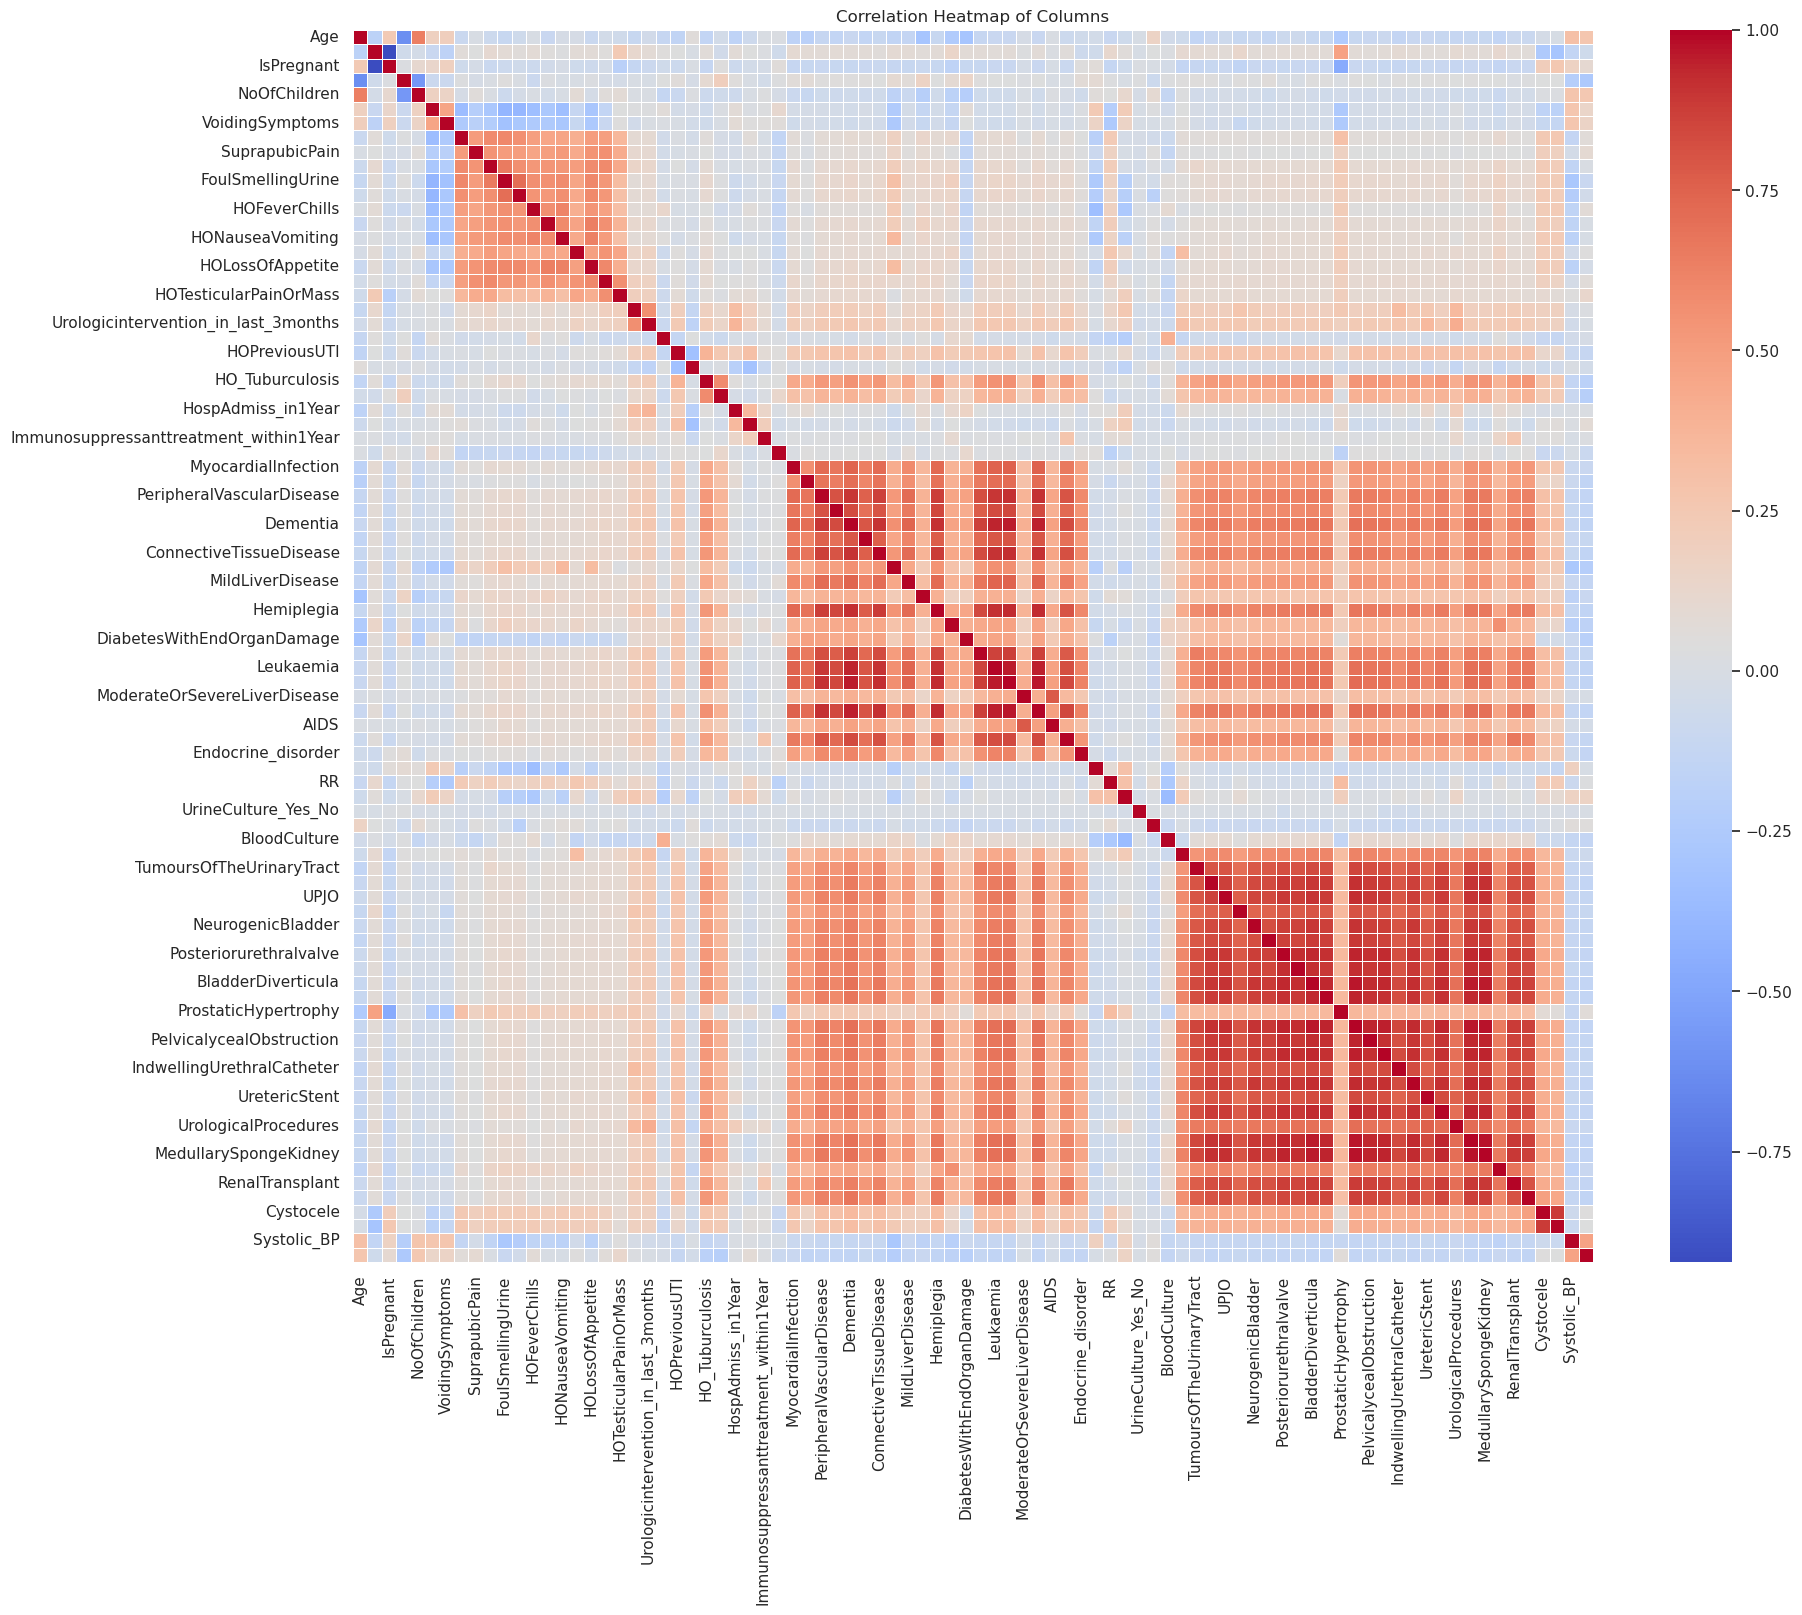

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df
# If your data is stored in a CSV file, you can read it into a DataFrame using pd.read_csv('filename.csv')

# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()

# Plotting correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Columns')
plt.show()

In [242]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than the threshold
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated columns
df_reduced = df_cleaned.drop(columns=to_drop)

# Display the remaining columns
print(df_reduced.columns)
print(df_reduced.shape)

Index(['Age', 'Gender', 'MaritalStatus', 'NoOfChildren', 'StorageSymptoms',
       'VoidingSymptoms', 'Dysuria', 'SuprapubicPain', 'Hematuria',
       'FoulSmellingUrine', 'CloudyUrine', 'HOFeverChills',
       'HOGeneralizedWeaknessMalaise', 'HONauseaVomiting', 'HOFlankPain',
       'HOLossOfAppetite', 'HOConstipation', 'HOTesticularPainOrMass',
       'HOCatheterization', 'Urologicintervention_in_last_3months',
       'InPatient_Yes_or_No', 'HOPreviousUTI',
       'DocumentationofInfection_within_1_Year', 'HO_Tuburculosis',
       'HO_SexualExposure', 'HospAdmiss_in1Year', 'PriorUseofAntibiotic',
       'Immunosuppressanttreatment_within1Year', 'TravelHistory_within_2weeks',
       'MyocardialInfection', 'CongestiveHeartFailure',
       'PeripheralVascularDisease', 'CerebrovascularDisease',
       'ChronicPulmonaryDisease', 'PepticUlcerDisease', 'MildLiverDisease',
       'DiabetesWithoutEndOrganDamage', 'ModerateOrSevereRenalDisease',
       'DiabetesWithEndOrganDamage', 'TumourWith

In [243]:
# # Identify highly correlated features
# threshold = 0.7
# high_corr_pairs = [(i, j, correlation_matrix.iloc[i, j]) for i in range(len(correlation_matrix.columns)) 
#                    for j in range(i+1, len(correlation_matrix.columns)) if abs(correlation_matrix.iloc[i, j]) > threshold]

# # Convert to DataFrame for better readability
# high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
# high_corr_df.sort_values(by='Correlation', ascending=False)
# # high_corr_pairs
# high_corr_df.shape

In [244]:
# aserty

In [245]:
# import pandas as pd
# import seaborn as sns

# # Load your data (replace with your data loading logic)


# # Calculate correlation matrix
# correlation = df_cleaned.corr()

# # Perform hierarchical clustering
# from scipy.cluster.hierarchy import linkage, dendrogram

# # Z is the linkage matrix
# Z = linkage(correlation, method='ward')

# # Create a new figure for plotting
# plt.figure(figsize=(10, 10))

# # Create heatmap with clustering dendrogram
# sns.heatmap(correlation, cmap='coolwarm', annot=True, 
#             cbar=False, square=True, 
#             ax=plt.gca())  # get current axes for dendrogram

# # Add dendrogram to the plot
# dendrogram(Z, orientation='top', labels=correlation.columns)

# plt.show()


In [246]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_reduced.drop(columns=['UrineCulture'])
y = df_reduced['UrineCulture']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [247]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Initialize RFE with the model
rfe = RFE(model, n_features_to_select=30)  # Adjust the number of features to select

# Fit RFE
rfe = rfe.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
X_selected = X_scaled[:, rfe.support_]


In [248]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

train_accuracy, test_accuracy


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END m

(0.9593032462391132, 0.6903103229892337)

In [249]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_selected, y, cv=5)

# Calculate the mean and standard deviation of the scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

mean_cv_score, std_cv_score


(0.6374464915385796, 0.016713050999973684)

In [250]:
# Tune hyperparameters with more focus on regularization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

train_accuracy, test_accuracy


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

(0.8837688044338876, 0.6991766941101963)

In [251]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

best_xgb_model = xgb_grid_search.best_estimator_

train_accuracy = best_xgb_model.score(X_train, y_train)
test_accuracy = best_xgb_model.score(X_test, y_test)

train_accuracy, test_accuracy


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END

(0.846714172604909, 0.6909436352121596)

In [252]:
cv_scores = cross_val_score(best_model, X_selected, y, cv=10)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

mean_cv_score, std_cv_score


(0.6574579262325327, 0.033402689796816126)

In [253]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=30)  # Adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the model again
model = RandomForestClassifier()
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

train_accuracy, test_accuracy


(1.0, 0.6510449651678277)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


# Assuming df_selected contains your selected 40 columns and target variable
X = df_reduced.drop('UrineCulture', axis=1)#all features
# X = df_selected  # Top 50 Features this top 50 are corelation with target column 
# X = df_previousmodel # top 30 features used in previous training 
y = df_reduced['UrineCulture']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler_top = StandardScaler()
# X_train_top_scaled = scaler_top.fit_transform(X_train_top)
# X_test_top_scaled = scaler_top.transform(X_test_top)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier()
}


# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(np.array(X_train))
    y_test_pred = classifier.predict(np.array(X_test))
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name} - Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}")



NameError: name 'df_reduced' is not defined

In [ ]:
pd.set_option('display.max_rows', None)